<a href="https://colab.research.google.com/github/url-github/Data-Engineering/blob/main/1_Spotify_1_EXTRACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/playlist?list=PLNkCniHtd0PNM4NZ5etgYMw4ojid0Aa6i

In [ ]:
# https://github.com/karolina-sowinska/free-data-engineering-course-for-beginners/blob/master/main.py

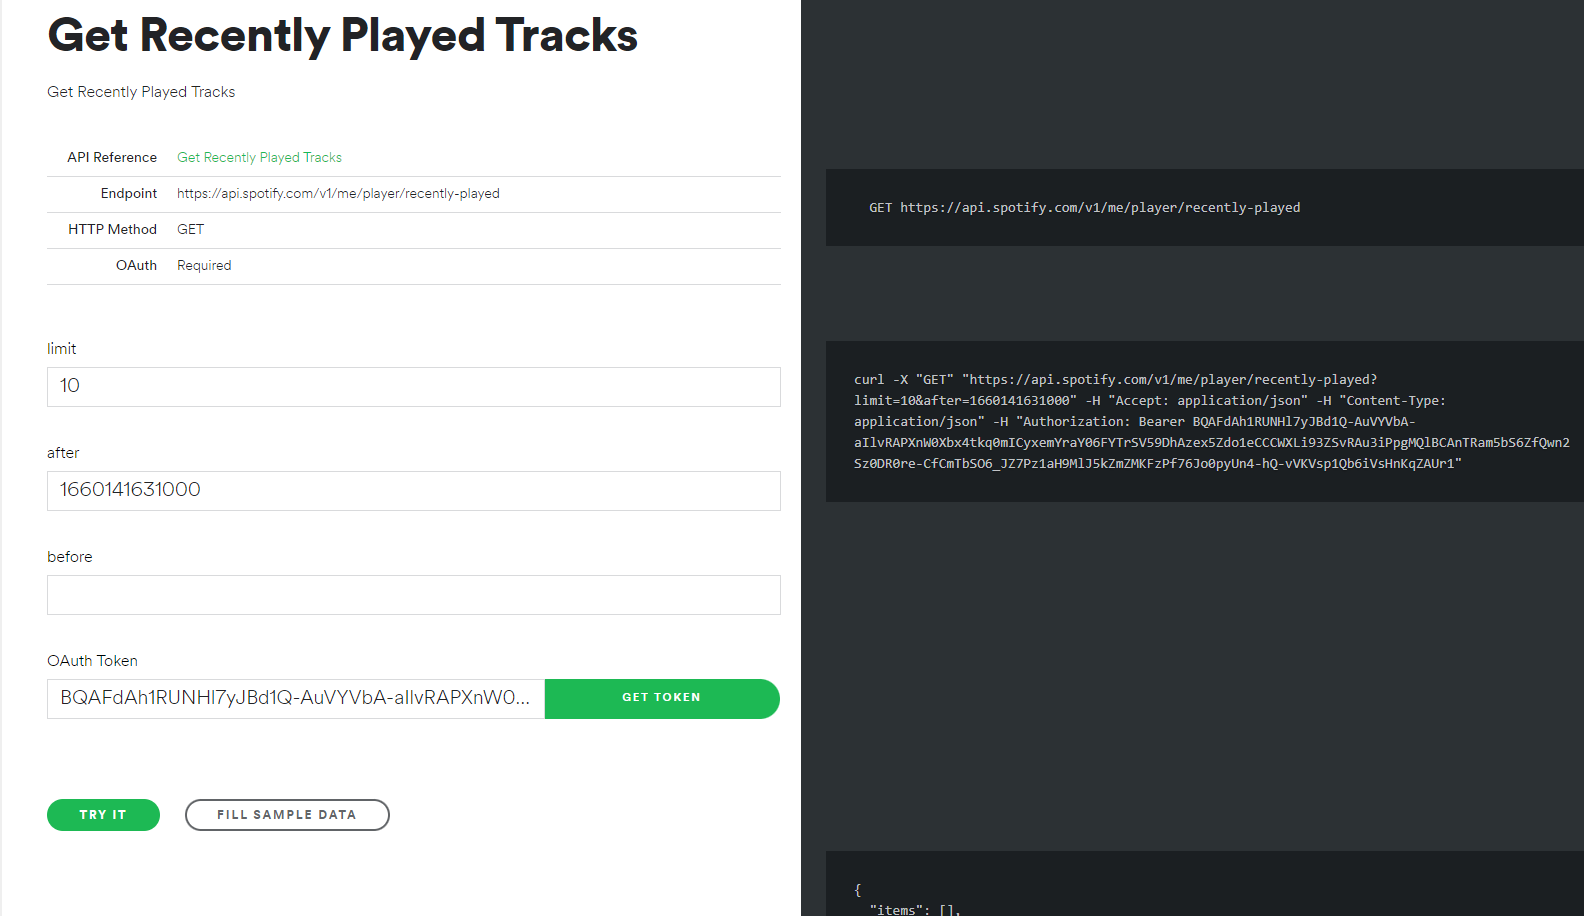

Pod tym URL generuje token API 

In [ ]:
# https://developer.spotify.com/console/get-recently-played/ 

# 1631288473000 timestamp

## I wersja 

In [ ]:
import sqlalchemy
import pandas as pd 
from sqlalchemy.orm import sessionmaker
import requests
import json
from datetime import datetime
import datetime
import sqlite3



DATABASE_LOCATION = "sqlite:///my_played_tracks.sqlite"
USER_ID = "31yahlyxg6b7b27ffx4qrguic5e4" # your Spotify username 
TOKEN = "BQAJiEijXYSnCHJomSazFQnNQZOHbGRDhZTi3R6HwcYcCUDqwnzMUtP6KMoxLysjZA-Mc-nN1TJWFc_TJUpMMvr_3cWa6XmJfNOrqutzSrfUWIGOGfXsoIkIB12B_62YgpTDf8k7StkwpReXcN5yYAYQdjBbCQt_vveh4VKLTGfBteQc_XicJw3ErDxHiMm7XOPJgjOG" # your Spotify API token

# Generate your token here:  https://developer.spotify.com/console/get-recently-played/
# Note: You need a Spotify account (can be easily created for free)

if __name__ == "__main__":

    # Wyodrębnij część procesu ETL
 
    headers = {
        "Accept" : "application/json",
        "Content-Type" : "application/json",
        "Authorization" : f'Bearer {TOKEN}'
    }
    
    # Konwertuj czas na uniksowy znacznik czasu w milisekundach     
    today = datetime.datetime.now()
    yesterday = today - datetime.timedelta(days=1)
    yesterday_unix_timestamp = int(yesterday.timestamp()) * 1000

    # Pobierz wszystkie utwory, których słuchałeś „po wczoraj”, czyli w ciągu ostatnich 24 godzin    
    r = requests.get("https://api.spotify.com/v1/me/player/recently-played?after={time}".format(time=yesterday_unix_timestamp), headers = headers)

    data = r.json()

    print(data)

{'items': [{'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0UuKseKszGlTLuf0QTy4uB'}, 'href': 'https://api.spotify.com/v1/artists/0UuKseKszGlTLuf0QTy4uB', 'id': '0UuKseKszGlTLuf0QTy4uB', 'name': 'Gabriel Mercado', 'type': 'artist', 'uri': 'spotify:artist:0UuKseKszGlTLuf0QTy4uB'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'M

## II wersja

Przekształcenie danych do df

In [ ]:
import sqlalchemy
import pandas as pd 
from sqlalchemy.orm import sessionmaker
import requests
import json
from datetime import datetime
import datetime
import sqlite3


DATABASE_LOCATION = "sqlite:///my_played_tracks.sqlite"
USER_ID = "31yahlyxg6b7b27ffx4qrguic5e4" # your Spotify username 
TOKEN = "BQCLrthKISKuBifWf8YK5-mav1P6zXOsiUmUYNwinEmE2KBBsjtjjfCTR4v7DjpG7MprNVw2axhEzf_y-L0YH4A6cRqWO9Tjq0rHgtLbCYQ8hfM6DNaxyaEDK20YQlFeotjiEJFXtDtTD3cnTeN7S8P6dLMmfStLXwItggy0hfoIP154RrYGXhWWR5-sHcF3OGNemAyW" # your Spotify API token

# Generate your token here:  https://developer.spotify.com/console/get-recently-played/
# Note: You need a Spotify account (can be easily created for free)

if __name__ == "__main__":

    # Wyodrębnij część procesu ETL
 
    headers = {
        "Accept" : "application/json",
        "Content-Type" : "application/json",
        "Authorization" : f'Bearer {TOKEN}'
    }
    
    # Konwertuj czas na uniksowy znacznik czasu w milisekundach     
    today = datetime.datetime.now()
    yesterday = today - datetime.timedelta(days=1)
    yesterday_unix_timestamp = int(yesterday.timestamp()) * 1000

    # Pobierz wszystkie utwory, których słuchałeś „po wczoraj”, czyli w ciągu ostatnich 24 godzin    
    r = requests.get("https://api.spotify.com/v1/me/player/recently-played?after={time}".format(time=yesterday_unix_timestamp), headers = headers)

    data = r.json()

    song_names = []
    artist_names = []
    played_at_list = []
    timestamps = []

    # Wyodrębnianie tylko odpowiednich danych z obiektu json     
    for song in data["items"]:
        song_names.append(song["track"]["name"])
        artist_names.append(song["track"]["album"]["artists"][0]["name"])
        played_at_list.append(song["played_at"])
        timestamps.append(song["played_at"][0:10])

    # Przygotuj słownik, aby przekształcić go w data frame poniżej       
    song_dict = {
        "song_name" : song_names,
        "artist_name": artist_names,
        "played_at" : played_at_list,
        "timestamp" : timestamps
    }

    song_df = pd.DataFrame(song_dict, columns = ["song_name", "artist_name", "played_at", "timestamp"])

    print(song_df)

                                            song_name  \
0          Comfortably Numb - 2011 Remastered Version   
1      Wots ... Uh The Deal - 2011 Remastered Version   
2                         Cluster One - 2011 Remaster   
3                      Time - 2011 Remastered Version   
4              Interstellar Overdrive - 2011 Remaster   
5               Us And Them - 2011 Remastered Version   
6             The Final Cut - 2011 Remastered Version   
7                    Sorrow - 2011 Remastered Version   
8                                  Wish You Were Here   
9   Shine On You Crazy Diamond, Pts. 1-5 - 2011 Re...   
10                   Astronomy Domine - 2011 Remaster   
11                 Fearless - 2011 Remastered Version   
12             Arnold Layne - 1996 Remastered Version   
13             Brain Damage - 2011 Remastered Version   
14                        Poles Apart - 2011 Remaster   
15     Breathe (In The Air) - 2011 Remastered Version   
16                             